
## Pandas


[Pandas](http://pandas.pydata.org) es una biblioteca para manipulación y análisis de datos basada en Numpy. Aporta nuevas estructuras de datos de alto nivel que extienden datos almacenados en arrays, aportando más semántica y nuevas operaciones. 

Puede pensarse a Pandas como un **reemplazo pythonico a excel**


Pandas introduce dos estructuras de datos principales: `Series` y `DataFrame`.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Series

Un Series es un objeto **unidemensional**, similar a un array, una lista o una columna en una tabla, que tiene **asociado una etiqueta** para cada elemento. Por defecto, esta etiqueta es un número de 0 a N

In [2]:
s1 = pd.Series([1,3,5,np.nan,6,8]) # creamos una serie, analogo a un array de 1D
print (s1)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [3]:
# Consultamos la información del tipo de dato Series
pd.Series?

Init signature:
pd.Series(
    data=None,
    index=None,
    dtype: 'Dtype | None' = None,
    name=None,
    copy: 'bool | None' = None,
    fastpath: 'bool | lib.NoDefault' = <no_default>,
) -> 'None'
Docstring:     
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, \*, \*\*) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Parameters
----------
data : array-like, Iterable, dict, or scalar value
    Contains data stored in Series. If data is a dict, argument order is
    maintained.
index : array-like or Index (1d)
    

Como vemos, es simplemente un envoltorio más bonito: el verdadero contenedor es un array de numpy que corresponde al atributo *values* del objeto Series.

In [4]:
print (s1.values) # Mostramos los valores de la Series en su atributo concreto
print (type(s1.values))

[ 1.  3.  5. nan  6.  8.]
<class 'numpy.ndarray'>


In [5]:
# Mostramos las dimensiones de los datos
print (s1.values.ndim)
print (s1.values.shape)

1
(6,)


Los índices de los elementos los tenemos en el atributo *index* del objeto Series.

In [8]:
print(s1.index)

print(list(s1.index))

RangeIndex(start=0, stop=6, step=1)
[0, 1, 2, 3, 4, 5]


Podemos crear el objeto Series dando valor a los índices.

In [14]:
#Especificando un índice
s = pd.Series([4, -5, 7, 2], index=['a', 'b', 'c', 'd'])
print (s)

a    4
b   -5
c    7
d    2
dtype: int64


También podemos crear un objeto Series a partir de un diccionario. Los índices son las claves del diccionario.

In [9]:
#A partir de diccionarios
d = {'Pamplona':195853, 'Tudela': 35388, 'Estella':13702, 'Alsasua':7490}
sDic = pd.Series(d)
print (sDic)

Pamplona    195853
Tudela       35388
Estella      13702
Alsasua       7490
dtype: int64


Una serie se puede indizar directamente como una secuencia, es decir, utilizando el índice (o índices) de los elementos a los que queremos acceder.

In [16]:
print (s[0]) # Un sólo elemento (no se muestra el índice puesto que lo has utilizado al mostrarlo)
print (s[0:2]) # Varios elementos, se muestran índices y valores
print (s['a':'c']) # Varios elementos, se muestran índices y valores

4
a    4
b   -5
dtype: int64
a    4
b   -5
c    7
dtype: int64


/var/folders/x1/zlr91hyj1kb9jx7yvlg1rcn80000gn/T/ipykernel_7122/1181081500.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print (s[0]) # Un sólo elemento (no se muestra el índice puesto que lo has utilizado al mostrarlo)


No obstante, las formas correctas de acceder a los elementos son utilizar los métodos especiales:
* `loc`: se utilizan las etiquetas de los índices de la serie.
* `iloc`: se utiliza la posicion que ocupan los valores en la serie. 

In [15]:
print (s.loc['a'])
print (s.iloc[0])

4
4


Si accedemos a un elemento cuyo ínidice no existe se lanza un error.

In [17]:
print (s['x'])

KeyError: 'x'

Podemos utilizar máscaras booleanas para acceder a elementos de las series.

In [18]:
#Algunas operaciones 
print (sDic>10000)
print (sDic[sDic>10000])

Pamplona     True
Tudela       True
Estella      True
Alsasua     False
dtype: bool
Pamplona    195853
Tudela       35388
Estella      13702
dtype: int64


Podemos comprobar si un valor está dentro de los índices de una serie.

In [13]:
print ('Pamplona' in sDic)
print ('Barañain' in sDic)

True
False


Hay muchas operaciones (basadas en NumPy) que podemos hacer sobre una serie.

In [14]:
print (s)
print (s.mean())
print (s.sum())
print (s.std())

a    4
b   -5
c    7
d    2
dtype: int64
2.0
8
5.0990195135927845


E incluso ver un resumen general de los datos

In [15]:
s.describe()

count    4.00000
mean     2.00000
std      5.09902
min     -5.00000
25%      0.25000
50%      3.00000
75%      4.75000
max      7.00000
dtype: float64

Es un poco más permisivo que Numpy con los datos faltantes (con los `nan`)

In [16]:
print (s1)
print (s1.mean())
print (s1.sum())
print (s1.std())

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
4.6
23.0
2.701851217221259


Y hay operaciones que no están disponibles en numpy o se comportan distinto

In [19]:
s1.median()

5.0

In [18]:
s1.values.median() # np.median(s.values)

AttributeError: 'numpy.ndarray' object has no attribute 'median'

Pandas es una herramienta nacida en la industria de las finanzas, y por ello intenta hacer fácil las cosas tipicas. Una de ellas es **graficar datos**. Utiliza **matplotlib** por defecto.

a    4
b   -5
c    7
d    2
dtype: int64


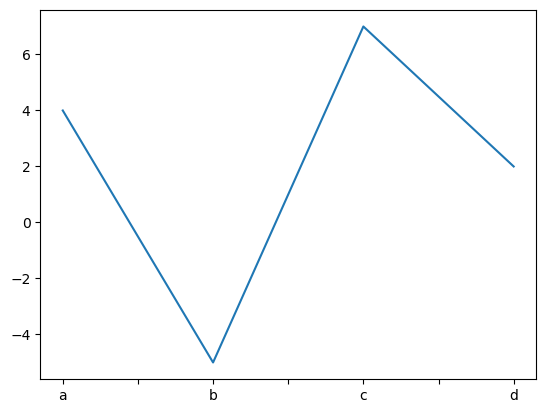

In [20]:
print (s)
s.plot()
plt.show() 

### Dataframe

Un DataFrame es una estructura tabular de **filas y columnas** (como una hoja de cálculo de Excel). 

También se puede pensar un DataFrame como un conjunto de Series que comparten el índice (es decir, la primera columna). Además, las columnas también tienen su propio índice (normalmente los nombres de las variables). 

In [27]:
df = pd.DataFrame(np.random.randn(10,4), index=np.arange(0,10), columns=list('ABCD'))
print (df)

          A         B         C         D
0 -0.137742  0.828410  2.198426 -0.445746
1  1.585192  0.975655  0.050073 -0.700035
2  1.564110 -0.331993  1.665760 -0.220418
3  1.244289 -1.136559  0.051299  1.101383
4 -0.755322 -0.086068  0.615254  0.060866
5  0.035004  1.433213 -2.517353  0.199487
6 -0.831402 -1.684154 -2.302909 -0.517978
7  1.114312 -0.913658 -1.814789 -1.001980
8 -1.833895  0.719075 -0.441527  0.360971
9  2.001399 -0.908030  0.864855  0.556723


También se pueden crear DataFrames a partir de diccionarios.

In [21]:
#DataFrame a partir de diccionario
d = {'localidad':['Pamplona', 'Pamplona', 'Pamplona', 'Tudela', 'Estella', 'Alsasua'],
    'poblacion':[183964, 196166, 195853, 35388, 13702, 7490],
    'año': [2001, 2014, 2015, 2015, 2015, 2015]}
data = pd.DataFrame(d)
print (data)

  localidad  poblacion   año
0  Pamplona     183964  2001
1  Pamplona     196166  2014
2  Pamplona     195853  2015
3    Tudela      35388  2015
4   Estella      13702  2015
5   Alsasua       7490  2015


Podemos mostrar fácilmente los primeros y los últimos elementos mediante los métodos:
* `head(numElementos)`: muestra los primeros numElementos (por defecto es 5).
* `tail(numElementos)`: muestra los últimos numElementos (por defecto es 5).

In [22]:
print (df.head())

          A         B         C         D
0 -0.211036 -1.467968  1.539985  1.508385
1  1.391786  3.358545 -1.265075  2.115600
2 -0.801575 -0.408656 -0.777570  0.611842
3 -1.050329  0.203058  0.617683  0.674858
4  1.384700  2.170056 -0.068015  0.817081


In [23]:
print (df.tail())

          A         B         C         D
5  0.648752 -1.085552 -0.423383  0.078904
6  1.751516 -0.397816  0.737594 -0.505592
7  1.432122  0.077843 -0.666845  0.389968
8 -1.181024 -0.181349  0.695378 -0.650440
9 -0.605608 -0.830436 -1.157353  0.370964


El acceso a las filas y columnas es como para las Series y podemos combinarlos (separandolos por comas)

In [24]:
print (df[0:2])
print (df['A'])
print (df.A)
print (df.loc[2:5,'B':'D'])

          A         B         C         D
0 -0.211036 -1.467968  1.539985  1.508385
1  1.391786  3.358545 -1.265075  2.115600
0   -0.211036
1    1.391786
2   -0.801575
3   -1.050329
4    1.384700
5    0.648752
6    1.751516
7    1.432122
8   -1.181024
9   -0.605608
Name: A, dtype: float64
0   -0.211036
1    1.391786
2   -0.801575
3   -1.050329
4    1.384700
5    0.648752
6    1.751516
7    1.432122
8   -1.181024
9   -0.605608
Name: A, dtype: float64
          B         C         D
2 -0.408656 -0.777570  0.611842
3  0.203058  0.617683  0.674858
4  2.170056 -0.068015  0.817081
5 -1.085552 -0.423383  0.078904


Las columnas son Series!

In [25]:
type(df.A)

pandas.core.series.Series

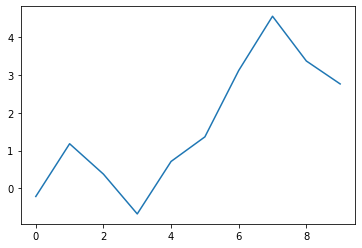

In [26]:
df["A"].cumsum().plot()
plt.show()

Pandas tambien puede importar archivos CSV o Excel, locales o remotos. Por ejemplo este [dataset](https://github.com/rjtavares/football-crunching/blob/master/datasets/cl-shots-2012.csv) de remates a porteria en la Champions League.

In [27]:
url = 'https://raw.githubusercontent.com/rjtavares/football-crunching/master/datasets/cl-shots-2012.csv'
tiros = pd.read_csv(url, index_col=0, na_values='N/A')

In [28]:
tiros.columns

Index(['dist', 'dx', 'dy', 'event_id', 'goal', 'play_id', 'player', 'shot',
       'team', 'x', 'y'],
      dtype='object')

In [29]:
tiros.head()

,dist,dx,dy,event_id,goal,play_id,player,shot,team,x,y
0,28.989564,28.245,6.528,4fc58cdd-544b-4c05-8b2f-1cdc3d5a8164,False,699caaab-f4d6-411c-b7ef-737ec6d23196,James Rodríguez,True,Porto,76.755,28.832
2,19.254175,-18.585,5.032,764b87c7-426b-45da-9921-9e0556b90922,False,373c02f2-81ff-4b46-b2df-16629800c8fb,Sammir,True,Dinamo Zagreb,18.585,27.404
8,25.772814,-20.790,-15.232,a276c188-492e-4ada-8168-5bee7e998cc7,False,e190760e-9912-4d36-99f7-a1ceb696b5da,Duje Čop,True,Dinamo Zagreb,20.790,48.280
10,35.180567,33.810,-9.724,b5f9dd79-14ff-4671-ad3a-a198abfa24a8,False,1204aee1-6925-48b1-92af-d70fa87b888f,Maicon,True,Porto,71.190,44.200
12,13.755000,13.755,0.000,3a0178d9-67c8-4018-b18e-cceb3fbbdf48,False,a968c9e5-6f17-48ab-9081-7210ce10b3ed,Miguel Lopes,True,Porto,91.245,38.012


Podemos filtrar el dataset por múltiples criterios. Por ejemplo, para calcular la distancia promedio de los goles que marcó Messi.

In [30]:
tiros[(tiros.player == 'Lionel Messi') & tiros.goal].dist.mean()

10.951773001848336

### Indexación: iteración sobre elementos

Podemos realizar iteradores sobre DataFrames utilizando los métodos:
* `iteritems()`: devuelve una tupla computes por el índice de cada columna y el valor de todas las filas
* `iterrows()`: deveuelve una tupla compuesta por el índice de la fila y el valor de todas las columnas

In [31]:
print (df)
for row,value in df.iterrows():
    print ("{}->{}".format(row,value))
  
print ("Cambio de impresión")

for column,value in df.iteritems():
    print ("{}->{}".format(column,value))

          A         B         C         D
0 -0.211036 -1.467968  1.539985  1.508385
1  1.391786  3.358545 -1.265075  2.115600
2 -0.801575 -0.408656 -0.777570  0.611842
3 -1.050329  0.203058  0.617683  0.674858
4  1.384700  2.170056 -0.068015  0.817081
5  0.648752 -1.085552 -0.423383  0.078904
6  1.751516 -0.397816  0.737594 -0.505592
7  1.432122  0.077843 -0.666845  0.389968
8 -1.181024 -0.181349  0.695378 -0.650440
9 -0.605608 -0.830436 -1.157353  0.370964
0->A   -0.211036
B   -1.467968
C    1.539985
D    1.508385
Name: 0, dtype: float64
1->A    1.391786
B    3.358545
C   -1.265075
D    2.115600
Name: 1, dtype: float64
2->A   -0.801575
B   -0.408656
C   -0.777570
D    0.611842
Name: 2, dtype: float64
3->A   -1.050329
B    0.203058
C    0.617683
D    0.674858
Name: 3, dtype: float64
4->A    1.384700
B    2.170056
C   -0.068015
D    0.817081
Name: 4, dtype: float64
5->A    0.648752
B   -1.085552
C   -0.423383
D    0.078904
Name: 5, dtype: float64
6->A    1.751516
B   -0.397816
C    0.73

### Operaciones básicas con Series y DataFrames

In [32]:
#Sumando Series
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index = ['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index = ['a', 'b', 'c', 'd', 'e'])
print (s1+s2)
print (s1.add(s2, fill_value=0))

a    5.2
b    NaN
c   -4.0
d    7.4
e    4.6
dtype: float64
a    5.2
b    3.6
c   -4.0
d    7.4
e    4.6
dtype: float64


In [33]:
#Sumando DataFrames
df1 = pd.DataFrame(np.arange(12).reshape(3,4) , columns=['a', 'b', 'c', 'd'])
print (df1)
df2 = pd.DataFrame(np.arange(20).reshape(4,5) , columns=list('abcde'))
print (df2)
print (df1+df2)
print (df1.add(df2, fill_value=0))


   a  b   c   d
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
    a   b   c   d   e
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19
      a     b     c     d   e
0   0.0   2.0   4.0   6.0 NaN
1   9.0  11.0  13.0  15.0 NaN
2  18.0  20.0  22.0  24.0 NaN
3   NaN   NaN   NaN   NaN NaN
      a     b     c     d     e
0   0.0   2.0   4.0   6.0   4.0
1   9.0  11.0  13.0  15.0   9.0
2  18.0  20.0  22.0  24.0  14.0
3  15.0  16.0  17.0  18.0  19.0


In [35]:
#Propagación
df1 = pd.DataFrame(np.arange(12).reshape(3,4) , columns=['a', 'b', 'c', 'd'])
serie = df1.loc[0]
print (df1)
print (serie)
print (df1-serie)

   a  b   c   d
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
a    0
b    1
c    2
d    3
Name: 0, dtype: int32
   a  b  c  d
0  0  0  0  0
1  4  4  4  4
2  8  8  8  8


In [36]:
#Aplicación de funciones
frame = pd.DataFrame(np.random.randn(4,3), columns=list('abc'), index = list('wxyz'))
print (frame)
print (np.abs(frame))
print (frame**2)

          a         b         c
w  1.141421 -0.410036  2.208773
x  0.537114 -1.123832  0.275843
y -0.666437 -0.975632  0.241155
z -0.221982  0.850281 -1.210857
          a         b         c
w  1.141421  0.410036  2.208773
x  0.537114  1.123832  0.275843
y  0.666437  0.975632  0.241155
z  0.221982  0.850281  1.210857
          a         b         c
w  1.302841  0.168130  4.878678
x  0.288491  1.262999  0.076090
y  0.444138  0.951857  0.058156
z  0.049276  0.722977  1.466175


In [37]:
print (frame)
print (frame.sum())
print (frame.sum(axis=1))

          a         b         c
w  1.141421 -0.410036  2.208773
x  0.537114 -1.123832  0.275843
y -0.666437 -0.975632  0.241155
z -0.221982  0.850281 -1.210857
a    0.790115
b   -1.659219
c    1.514915
dtype: float64
w    2.940158
x   -0.310875
y   -1.400913
z   -0.582559
dtype: float64


In [38]:
print (frame)
print (frame.sort_values(by='a'))
print (frame.sort_values(by=['b','a']))

          a         b         c
w  1.141421 -0.410036  2.208773
x  0.537114 -1.123832  0.275843
y -0.666437 -0.975632  0.241155
z -0.221982  0.850281 -1.210857
          a         b         c
y -0.666437 -0.975632  0.241155
z -0.221982  0.850281 -1.210857
x  0.537114 -1.123832  0.275843
w  1.141421 -0.410036  2.208773
          a         b         c
x  0.537114 -1.123832  0.275843
y -0.666437 -0.975632  0.241155
w  1.141421 -0.410036  2.208773
z -0.221982  0.850281 -1.210857


In [39]:
#Aplicación de funciones para cada columna
print (frame)
print (frame.apply(np.min))
print (frame.apply(np.sum))
print (frame.apply(lambda x: (x-x.min())/(x.max()-x.min())))

          a         b         c
w  1.141421 -0.410036  2.208773
x  0.537114 -1.123832  0.275843
y -0.666437 -0.975632  0.241155
z -0.221982  0.850281 -1.210857
a   -0.666437
b   -1.123832
c   -1.210857
dtype: float64
a    0.790115
b   -1.659219
c    1.514915
dtype: float64
          a         b         c
w  1.000000  0.361578  1.000000
x  0.665733  0.000000  0.434755
y  0.000000  0.075072  0.424611
z  0.245846  1.000000  0.000000


In [40]:
#Aplicación de funciones para cada elemento del DataFrame
print (frame)
print (frame.applymap(lambda x:int(x)*10%4))

          a         b         c
w  1.141421 -0.410036  2.208773
x  0.537114 -1.123832  0.275843
y -0.666437 -0.975632  0.241155
z -0.221982  0.850281 -1.210857
   a  b  c
w  2  0  0
x  0  2  0
y  0  0  0
z  0  0  2


### Unión de DataFrames

In [4]:
df1 = pd.DataFrame({'clave': list('bbacaab'), 'd1':range(7)})
df2 = pd.DataFrame({'clave': list('abd'), 'd2': range(3)})
print (df1)
print (df2)
print (pd.merge(df1,df2))
print( pd.merge(df1,df2, on='clave'))

  clave  d1
0     b   0
1     b   1
2     a   2
3     c   3
4     a   4
5     a   5
6     b   6
  clave  d2
0     a   0
1     b   1
2     d   2
  clave  d1  d2
0     b   0   1
1     b   1   1
2     a   2   0
3     a   4   0
4     a   5   0
5     b   6   1
  clave  d1  d2
0     b   0   1
1     b   1   1
2     a   2   0
3     a   4   0
4     a   5   0
5     b   6   1


In [42]:
print (pd.merge(df1,df2))
print (pd.merge(df1,df2,how='left'))
print (pd.merge(df1,df2,how='right'))
print (pd.merge(df1,df2,how='outer'))

  clave  d1  d2
0     b   0   1
1     b   1   1
2     b   6   1
3     a   2   0
4     a   4   0
5     a   5   0
  clave  d1   d2
0     b   0  1.0
1     b   1  1.0
2     a   2  0.0
3     c   3  NaN
4     a   4  0.0
5     a   5  0.0
6     b   6  1.0
  clave   d1  d2
0     a  2.0   0
1     a  4.0   0
2     a  5.0   0
3     b  0.0   1
4     b  1.0   1
5     b  6.0   1
6     d  NaN   2
  clave   d1   d2
0     b  0.0  1.0
1     b  1.0  1.0
2     b  6.0  1.0
3     a  2.0  0.0
4     a  4.0  0.0
5     a  5.0  0.0
6     c  3.0  NaN
7     d  NaN  2.0


### Agrupamiento mediante groupby

In [ ]:
df = pd.DataFrame({'clave1':list('aabba'),
                  'clave2':['uno', 'dos', 'uno', 'dos', 'uno'],
                  'd1': np.random.randn(5),
                  'd2': np.random.randn(5)})
print (df)
obj = df.groupby('clave1')
print (obj.mean())
print (obj.mean().d1)  #es mas eficiente hacer obj.d1.mean()
print (obj.mean().d2)
print (obj.sum())
print (obj.min())
print (obj.max())
print (obj.first())
print (obj.last())

  clave1 clave2        d1        d2
0      a    uno -0.198901  0.174650
1      a    dos -1.129910 -0.952831
2      b    uno -0.873601  0.182767
3      b    dos -0.465949 -2.356008
4      a    uno -1.104117 -1.295388
              d1       d2
clave1                   
a      -0.810976 -0.69119
b      -0.669775 -1.08662
clave1
a   -0.810976
b   -0.669775
Name: d1, dtype: float64
clave1
a   -0.69119
b   -1.08662
Name: d2, dtype: float64
              d1        d2
clave1                    
a      -2.432928 -2.073569
b      -1.339550 -2.173241
       clave2        d1        d2
clave1                           
a         dos -1.129910 -1.295388
b         dos -0.873601 -2.356008
       clave2        d1        d2
clave1                           
a         uno -0.198901  0.174650
b         uno -0.465949  0.182767
       clave2        d1        d2
clave1                           
a         uno -0.198901  0.174650
b         uno -0.873601  0.182767
       clave2        d1        d2
clave1      

In [44]:
obj2 = df.groupby(['clave1','clave2'])
print (obj2.mean())
print (obj2.mean().d1)
print (obj2.mean().d2)
print (obj2.sum())
print (obj2.min())
print (obj2.max())
print (obj2.first())
print (obj2.last())

                     d1        d2
clave1 clave2                    
a      dos    -1.129910 -0.952831
       uno    -0.651509 -0.560369
b      dos    -0.465949 -2.356008
       uno    -0.873601  0.182767
clave1  clave2
a       dos      -1.129910
        uno      -0.651509
b       dos      -0.465949
        uno      -0.873601
Name: d1, dtype: float64
clave1  clave2
a       dos      -0.952831
        uno      -0.560369
b       dos      -2.356008
        uno       0.182767
Name: d2, dtype: float64
                     d1        d2
clave1 clave2                    
a      dos    -1.129910 -0.952831
       uno    -1.303018 -1.120738
b      dos    -0.465949 -2.356008
       uno    -0.873601  0.182767
                     d1        d2
clave1 clave2                    
a      dos    -1.129910 -0.952831
       uno    -1.104117 -1.295388
b      dos    -0.465949 -2.356008
       uno    -0.873601  0.182767
                     d1        d2
clave1 clave2                    
a      dos    -1.129910 

In [ ]:
#Aplicación de funciones de agregación definidas por el usuario
print (obj.agg(lambda x: 0.5*min(x)+0.5*max(x)))

              d1        d2
clave1                    
a      -0.664405 -0.560369
b      -0.669775 -1.086620


C:\ProgramData\Anaconda3\envs\py38ml\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


In [46]:
d = {'d1':['mean', 'prod'],
    'd2': ['min', 'max']}
agregado = obj.agg(d)
print (agregado)

              d1                  d2          
            mean      prod       min       max
clave1                                        
a      -0.810976 -0.248139 -1.295388  0.174650
b      -0.669775  0.407054 -2.356008  0.182767


Esta operación anterior hace que el dataframe utilice un tipo de índice especial llamado `MultiIndex`. Para acceder a los datos de una columna hay que especificar la combinación entre las etiquetas como una tupla.

In [47]:
print( agregado.sort_values(('d1','prod'), ascending=True))

              d1                  d2          
            mean      prod       min       max
clave1                                        
a      -0.810976 -0.248139 -1.295388  0.174650
b      -0.669775  0.407054 -2.356008  0.182767


### PivotTables

Una alternativa aún más poderosa para agregar datos es hacer un pivot de datos, donde se definen una o múltples filas y columnas para agrupar datos, y la dimesiones ('values') que se quieren ver resumidas. La función de agregación por defecto es `np.mean`.

In [48]:
df = pd.DataFrame({'Nombre':list('abcdefghij'), 
                      'Origen':['Alemania', 'Alemania','Alemania', 'Francia', 'Francia','Francia','Italia','Italia','Italia','Italia'],
                      'Num1':[10, 14, 12, 14, 16, 18, 4, 8, 6, 10],
                       'Num2':[100, 123, 125, 138, 154, 195, 42, 76, 65, 101],
                      'Sexo':['m', 'f', 'f', 'f', 'm','m','m','m','f','f']})
print (df)
nueva1 = df.pivot_table(values='Num1', index='Origen', columns='Sexo', aggfunc='mean')
nueva2 = df.pivot_table(values='Num2', index='Origen', columns='Sexo', aggfunc='mean')
print (nueva1)
print (nueva2)

  Nombre    Origen  Num1  Num2 Sexo
0      a  Alemania    10   100    m
1      b  Alemania    14   123    f
2      c  Alemania    12   125    f
3      d   Francia    14   138    f
4      e   Francia    16   154    m
5      f   Francia    18   195    m
6      g    Italia     4    42    m
7      h    Italia     8    76    m
8      i    Italia     6    65    f
9      j    Italia    10   101    f
Sexo       f   m
Origen          
Alemania  13  10
Francia   14  17
Italia     8   6
Sexo          f      m
Origen                
Alemania  124.0  100.0
Francia   138.0  174.5
Italia     83.0   59.0
